In [51]:
import math

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
# import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [4]:
housing = fetch_california_housing()

print(type(housing))
print(housing.target)

<class 'sklearn.utils._bunch.Bunch'>
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
data = housing.data[:, 0:2]
target = housing.target

In [6]:
# create dataframe
df = pd.DataFrame(data, columns=housing.feature_names[0:2])
df['target'] = target

df.shape

(20640, 3)

In [7]:
df.head(1)

MedInc  HouseAge  target
0  8.3252      41.0   4.526

In [8]:
def create_scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, marker='o', alpha=0.6)
    plt.title(f'Scatter Plot of {x.title()} vs {y.title()}')
    plt.xlabel(f'{x.title()}')
    plt.ylabel(f'{y.title()}')
    plt.show()

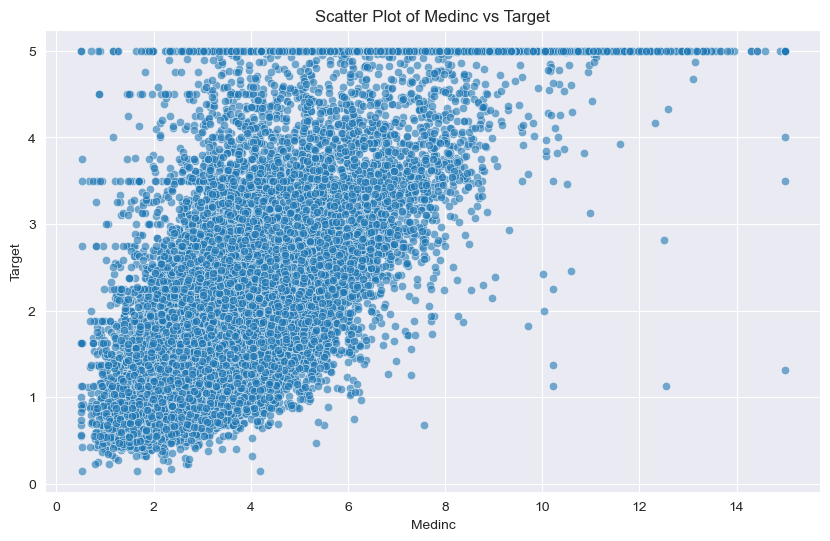

In [9]:
create_scatter_plot('MedInc', 'target')

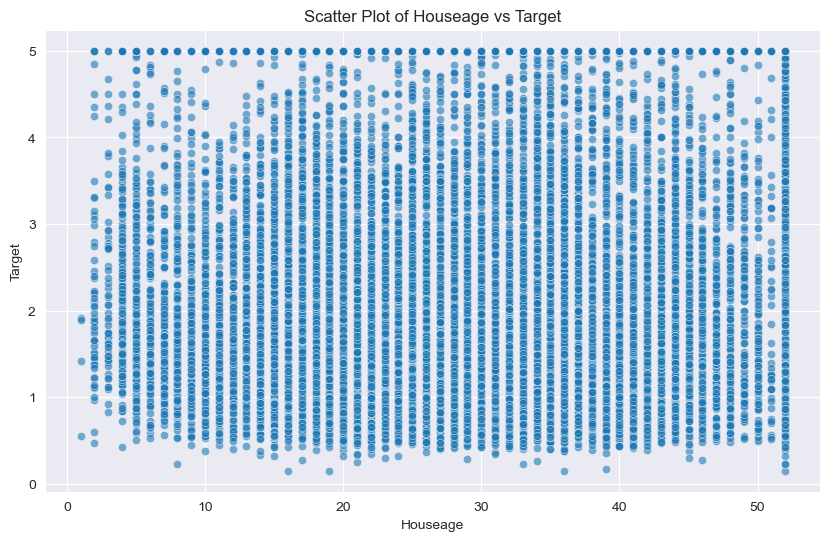

In [10]:
create_scatter_plot('HouseAge', 'target')

In [11]:
def create_box_plot(column):
    plt.boxplot(df[column], vert=True)
    plt.xlabel(f'{column.title()}')
    plt.ylabel('Count')
    plt.show()

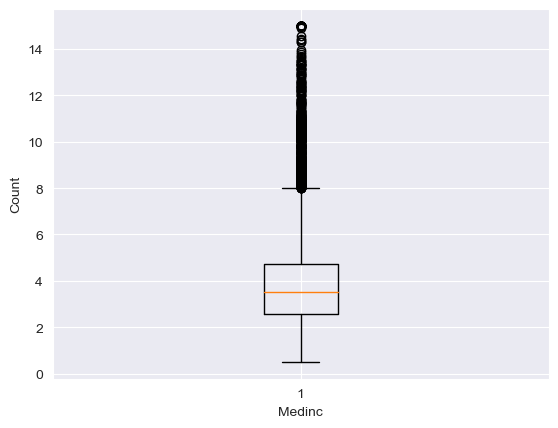

In [12]:
# boxplot
create_box_plot('MedInc')

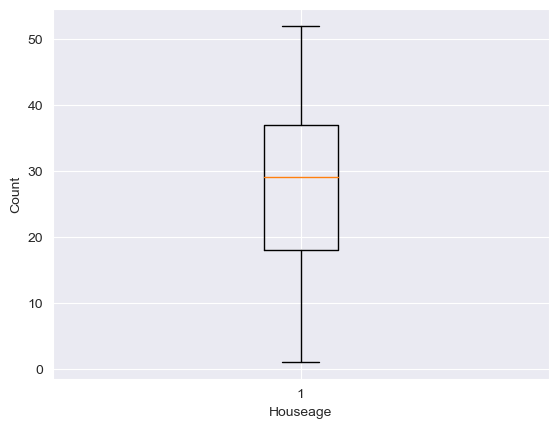

In [13]:
# boxplot
create_box_plot('HouseAge')

In [14]:
# x = feature0
# y = feature1
# z = target

import plotly.express as px

fig = px.scatter_3d(
    df, x='MedInc', y='HouseAge', z='target', color='MedInc'
)
fig.show()


In [15]:
df.corr()

MedInc  HouseAge    target
MedInc    1.000000 -0.119034  0.688075
HouseAge -0.119034  1.000000  0.105623
target    0.688075  0.105623  1.000000

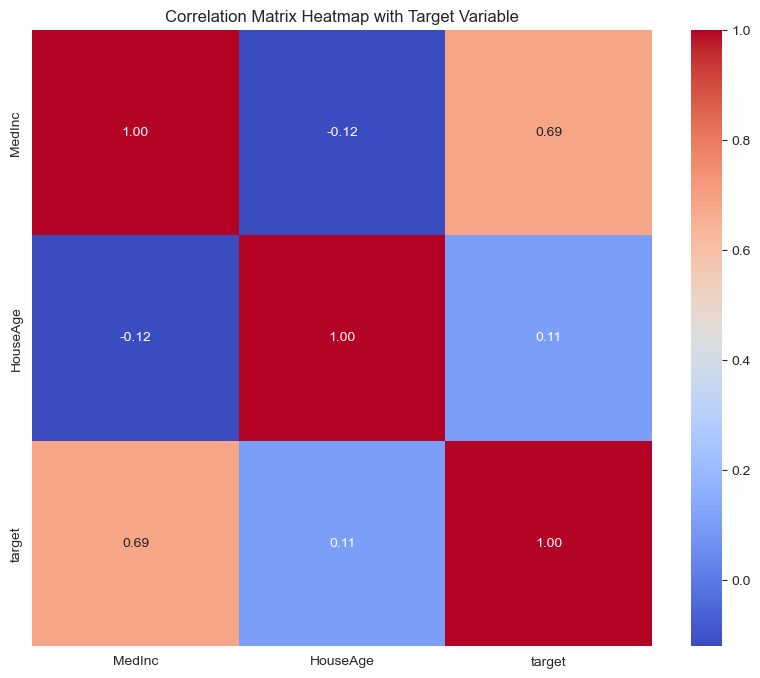

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap with Target Variable')
plt.show()

### defining features and target

In [17]:
X = df[['MedInc', 'HouseAge']]
y = df['target']

X.shape, y.shape

((20640, 2), (20640,))

### Split data into train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# can also use the following
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14448, 2), (14448,), (6192, 2), (6192,))

### Simple linear regression

In [19]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

# we can use .predict() method to use the model for predicting new observations

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### r2 score train and test

In [20]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.2f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.51
Test R2 Score:  0.5087


### RMSE score train and test

In [21]:
rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))

print('Train RMSE: {:.2f}'.format(rmse_train))
print('Test RMSE: {:.2f}'.format(rmse_test))

Train RMSE: 0.81
Test RMSE: 0.80


y = b1x + b2x + c (c = intercept, b1 & b2 here are .coef_)

In [22]:
model.intercept_

-0.10299578449606095

In [23]:
model.coef_

array([0.43176259, 0.01743944])

### Interaction Features

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)

X_train = interaction.fit_transform(X_train)
X_test = interaction.fit_transform(X_test)
# y_train = interaction.fit_transform(y_train)
# y_test = interaction.fit_transform(y_test)

X_train[1:4]

array([[  2.8631,  20.    ,  57.262 ],
       [  4.2026,  24.    , 100.8624],
       [  3.1094,  14.    ,  43.5316]])

In [25]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

# we can use .predict() method to use the model for predicting new observations

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.5098
Test R2 Score:  0.5095


### Polynomial Features

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 
# polynomial = PolynomialFeatures(degree=3, interaction_only=True)
# 
# X_train = polynomial.fit_transform(X_train)
# X_test = polynomial.fit_transform(X_test)
# # y_train = interaction.fit_transform(y_train)
# # y_test = interaction.fit_transform(y_test)
# 
# X_train[1:4]

In [27]:
polynomial = PolynomialFeatures(degree=10, include_bias=False)
features_polynomial = polynomial.fit_transform(X)

features_polynomial[0]

array([8.32520000e+00, 4.10000000e+01, 6.93089550e+01, 3.41333200e+02,
       1.68100000e+03, 5.77010912e+02, 2.84166716e+03, 1.39946612e+04,
       6.89210000e+04, 4.80373125e+03, 2.36574474e+04, 1.16508353e+05,
       5.73781109e+05, 2.82576100e+06, 3.99920234e+04, 1.96952981e+05,
       9.69955344e+05, 4.77684249e+06, 2.35250255e+07, 1.15856201e+08,
       3.32941593e+05, 1.63967296e+06, 8.07507223e+06, 3.97681691e+07,
       1.95850542e+08, 9.64526045e+08, 4.75010424e+09, 2.77180535e+06,
       1.36506053e+07, 6.72265913e+07, 3.31077961e+08, 1.63049493e+09,
       8.02987223e+09, 3.95455678e+10, 1.94754274e+11, 2.30758339e+07,
       1.13644019e+08, 5.59674818e+08, 2.75629024e+09, 1.35741964e+10,
       6.68502923e+10, 3.29224761e+11, 1.62136828e+12, 7.98492523e+12,
       1.92110932e+08, 9.46109190e+08, 4.65940480e+09, 2.29466675e+10,
       1.13007900e+11, 5.56542053e+11, 2.74086198e+12, 1.34982152e+13,
       6.64760995e+13, 3.27381934e+14, 1.59936193e+09, 7.87654823e+09,
      

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features_polynomial, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 65), (6192, 65), (14448,), (6192,))

In [29]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.3330
Test R2 Score:  -0.6743


Regularization: helps to battle overfitting by penalizing model so it does not become too complex

overfitting happens when a model tries too hard to capture the noise in thr training dataset

Lasso regularization works on predictors that are less important 

In [30]:
feature = housing.data[:, :]
target = housing.target

df = pd.DataFrame(data=feature, columns=housing.feature_names[0:8])

df['target'] = target
X = df.loc[:, df.columns != 'target']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
regression = Lasso(alpha=0.1)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.5461
Test R2 Score:  0.5451


In [43]:
regression = Lasso(alpha=0.01)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.6052
Test R2 Score:  0.5998


Use Ridge when we've plenty of predictors and most of them have tiny effect (or all have small contribution/correlation to the target)

In [45]:
regression = Ridge(alpha=0.5)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.6093
Test R2 Score:  0.5958


In [50]:
regression = Ridge(alpha=0.1)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.6093
Test R2 Score:  0.5958


In [53]:
regression = ElasticNet(alpha=1)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.4242
Test R2 Score:  0.4238


In [54]:
regression = ElasticNet(alpha=0.5)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.4872
Test R2 Score:  0.4862


In [55]:
regression = ElasticNet(alpha=.1)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.5762
Test R2 Score:  0.5755


In [56]:
regression = ElasticNet(alpha=.01)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.6072
Test R2 Score:  0.5999


In [57]:
regression = ElasticNet(alpha=.001)
model = regression.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train R2 Score: {:.4f}'.format(r2_train))
print('Test R2 Score: ', r2_test.round(4))

Train R2 Score: 0.6093
Test R2 Score:  0.5966


In [ ]:
# TODO: use lecture 7-csv, where your target is SalePrice